In [1]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import random as rd
from sklearn.linear_model import Perceptron
from numpy.linalg import inv
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import tplquad

# 1)

LFD 2.24

# b) and c)

In [2]:

#returns the average slope and intercept over n simulations
def g_bar(n):
    x = 0
    y = 0
    for i in range(n):
        a = np.random.uniform(-1, 1)
        b = np.random.uniform(-1, 1)
        x = x + a + b
        y = y + (- a * b)
    x = x/n
    y = y/n
    return (x , y) 

answer = []
coordinate = g_bar(100000)
answer.append(coordinate)

In [3]:
answer

[(-0.0017210038858246884, -0.00037497946810838935)]

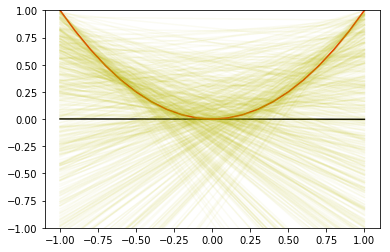

In [4]:
#graphing g bar - Denoted by blue
for x in range(len(answer)):
    slope, intercept = answer[x]

    gx = np.array([-1, 1])
    gy = slope * gx + intercept
    plt.plot(gx,gy,c = 'black',alpha=1.0)



#graphing f(x) - Denoted by red
x1 = []
for x in range(21):
    x1.append(-1 + x *0.1)
y1 = [x1[x]**2for x in range(len(x1))]

plt.plot(x1,y1, c = 'r', alpha = 1.0)

#graphing all possible g(x) - Denoted by the yellow
for x in range(500):
    x_r = np.array([-1, 1])
    a =rd.uniform(-1,1)
    b =rd.uniform(-1,1)
    slope = a+b
    b = -a *b
    
    y_r = slope*x_r+b
    plt.plot(x_r, y_r, c = 'y', alpha =0.05)
    
plt.ylim([-1, 1])
plt.show()


In [5]:
#generating variance
def integrand_variance(x, x1, x2):
    slope, intercept = answer[0]
    g_bar = slope * x + intercept
    a1 = (x1 + x2)
    b1 = -x1 * x2
    g_data = a1 * x + b1
    return 1 / 8 * (g_data - g_bar) ** 2
    
#generating bias
def integrand_bias(x):
    slope, intercept = answer[0]
    g_bar = slope * x + intercept
    target = x**2 
    return (g_bar - target) ** 2 / 2



ans, err = quad(integrand_bias, -1, 1)
ans_v, err_v = integrate.tplquad(integrand_variance, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)
print("Variance is {}".format(ans_v))
print("Bias is {}".format(ans))
#error out is = bias + variance
print("Error out is {}".format(ans + ans_v))

Variance is 0.33333446122772653
Bias is 0.20025111420646544
Error out is 0.5335855754341919


# 2)

LFD 3.1

In [6]:
rad = 10
thk = 5
sep = 5
N = 2000
n = 1000

#Seperating pic into top half vs bottom half
#generate outputs (-1, 1) in array y
#for all y>1, 
#tags all points in bottom half as -1, top as +1
#saves everything into one array
#return array of coordinates X (X,y) and corresponding output in another array y (-1, 1)

#upper half center coordinates
upper_x = 0
upper_y = 0

#bottom half center coordinates
lower_x = upper_x + rad + thk / 2
lower_y = upper_y - sep
#creating the theta needed to generate semicircles
Theta = np.random.uniform(0, 2*np.pi, n)
#uniformly drawing 'n' samples between bounds of (rad, rad + thickness)
converter = np.random.uniform(rad, rad+thk, n)
#taking array Theta and changing all values < pi to 1, > to 0. Making a binary array
#this allows us to know which data points are on top half, which on bottom
y = 2 * (Theta < np.pi) - 1
X = np.zeros((n, 2))
#for all values out put is +1, input the coordinates of the center for top half
#for all values out put is -1, input the coordinates of the center for bottom half
X[y > 0] = np.array([upper_x, upper_y])
X[y < 0] = np.array([lower_x, lower_y])
#for each element in X, convert the x coordinate [0] and y coordinate [2]
#by their corresponding angle theta
X[:, 0] += np.cos(Theta) * converter
X[:, 1] += np.sin(Theta) * converter


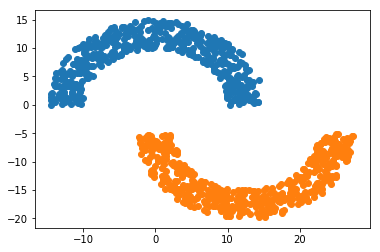

In [7]:
#plotting the first half and second half seperately
plt.scatter(X[y>0][:, 0], X[y>0][:, 1])
plt.scatter(X[y<0][:, 0], X[y<0][:, 1])
plt.show()

# a)

In [8]:
def PLA(X, y):
    input_size, d = X.shape
    #making default 0 weights
    w = np.zeros(d)
    iterator = 0
    #used to check for convergence
    n = X.shape[0]
    check = 0
    #PLA application - checking if converged
    while not(check == n):
        #checking if missclassified
        if np.sign(X[iterator, :].dot(w) * y[iterator]) <= 0:
            #PLA weight adjustment
            w += y[iterator] * X[iterator, :]
        #moving on to next weight, input, corresponding output, etc.
        iterator += 1
        #restarting the loop when iterator == size of inputs 
        if iterator == input_size:
            iterator = 0
        #computing the sum input times weight 
        check = np.sum(X.dot(w) * y > 0)
    return w

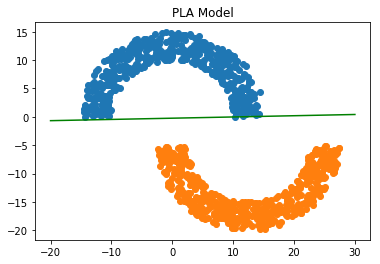

In [9]:
X_treat = np.c_[np.ones(int(N/2)), X]
weights = PLA(X_treat, y)

#boundaries for the PLA
a_1 = np.array([-20,30])
#corresponding output
b_1 = - (weights[0] + weights[1] * a_1) / weights[2]
#plotting the top half 
plt.scatter(X[y>0][:, 0], X[y>0][:, 1])
#plotting the bottom half
plt.scatter(X[y<0][:, 0], X[y<0][:, 1])
#plotting the PLA result
plt.title('PLA Model')
plt.plot(a_1, b_1,c='g')
plt.show()


# b)

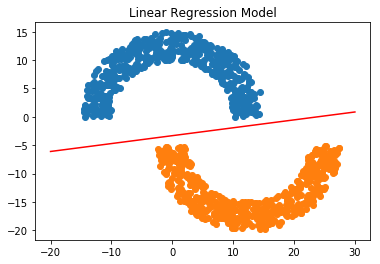

In [10]:
X_treat = np.c_[np.ones(int(N/2)), X]
w1 = inv(X_treat.T.dot(X_treat)).dot(X_treat.T).dot(y)
b2 = - (w1[0] + w1[1] * a_1) / w1[2]
plt.scatter(X[y>0][:, 0], X[y>0][:, 1])
plt.scatter(X[y<0][:, 0], X[y<0][:, 1])
plt.title('Linear Regression Model')
plt.plot(a_1, b2, c="r")
plt.show()

# 4)



# a)

In [16]:
count = 0
for x in range (100000):
    #generating the rows and columns
    row = rd.randint(3,9)
    col = rd.randint(1, row-1)
    #making the array
    array = np.random.rand(row,col)
    #transposing the array
    array_t = array.transpose()
    #multiplying
    mult = np.dot(array_t,array)
    #counting number of times that it is invertible
    if abs(np.linalg.det(mult)) > 10**(-10):
        count+=1
count = count/100000
count



1.0

# b)

It looks like a matrix is always invertible when it is the dot product of X^T and X. It's important to note that this is what allows us to use matrices for linear regression.

# 5)

# b)

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
dataset_1 = np.loadtxt('sampleQuadData2.txt')
(numSamples_1, numFeatures_1) = dataset_1.shape
feat_1 = dataset_1[:,range(numFeatures_1-1)].reshape((numSamples_1, numFeatures_1-1))
output_1 = dataset_1[:, numFeatures_1-1].reshape((numSamples_1,))

(numSamples_1, numFeatures_1) = feat_1.shape

perceptron_1 = Perceptron(fit_intercept=False)
perceptron_1.fit(feat_1,output_1)
perceptron_1.score(feat_1,output_1)



/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.52

In [14]:
dataset_2 = np.loadtxt('sampleQuadData2Transformed.txt')
(numSamples_2, numFeatures_2) = dataset_2.shape
feat_2 = dataset_2[:,range(numFeatures_2-1)].reshape((numSamples_2, numFeatures_2-1))
output_2 = dataset_2[:, numFeatures_2-1].reshape((numSamples_2,))

perceptron_2 = Perceptron(fit_intercept=False)
perceptron_2.fit(feat_2,output_2)
perceptron_2.score(feat_2,output_2)

/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.89

In [15]:
print(perceptron_1.coef_)
print('Error Rate for 1 is:')
print(1-perceptron_1.score(feat_1,output_1))
print(perceptron_2.coef_)
print('Error Rate for 2 is:')
print(1-perceptron_2.score(feat_2,output_2))

[[-2.02428985  3.75626857]]
Error Rate for 1 is:
0.48
[[ 29.       -81.788771  10.390278   1.120849 157.443083   3.924539]]
Error Rate for 2 is:
0.10999999999999999


The error rates for the non transformed data set is 0.48, whereas the error rate for 2 is 0.10999, implying 89% accuracy. This makes sense in that there are more variables in the transformed data's boundary space, allowing a better fitting fencing between the positive and negative data outputs